In [22]:
import importlib
import core
import paint_link
_=importlib.reload(core)
import ipywidgets as w
import base64
from IPython.display import display
from ipywidgets import HTML
import math
import random

## RemoteQuote


In [2]:
#example painting surface inputs

room_test_painting_surface = core.PaintingSurface(core.Wall(8), core.Paint(30, 5, 17))
room_test_painting_surface_2 = core.PaintingSurface(core.Wall(10), paint_link.MattEmulsionPaint())
room_test_painting_surface_3 = core.PaintingSurface(core.Wall(20, substrate=core.Plaster()), paint_link.DiamondMattEmulsion())
room_test_painting_surface_4 = core.PaintingSurface(core.Skirtingboard(1, substrate=core.Mdf(primed=True)), paint_link.OilEggshell())

In [3]:
#example room inputs 

room_1 = core.Room([room_test_painting_surface, room_test_painting_surface_2])
room_2 = core.Room([room_test_painting_surface_3, room_test_painting_surface_4])

room_1.name = 'room 1'
room_2.name = 'room 2'

In [4]:
#example job input

job_1= core.Job([room_1, room_2])


job_1.get_breakdown()
job_1.get_total_price()

390.77

In [5]:
job_1.get_painting_surface_list()

In [6]:
lst = [[1,4,3],[1,3,3], [1,6,7], [1,1,1]]
lst.sort(key=lambda x:x[1])
print(lst)

[[1, 1, 1], [1, 3, 3], [1, 4, 3], [1, 6, 7]]


In [7]:
optimal_surface = get_optimal_surface(job_1)

NameError: name 'get_optimal_surface' is not defined

In [10]:


def get_area_cost_lists(painting_surface_list):
       
    surface_area_list = []
    painting_price_list = []
    
    # creating value and cost lists for knapsack
    for painting_surface in painting_surface_list:
        surface_area_list.append(painting_surface.surface.area)
        painting_price_list.append(math.ceil(painting_surface.get_total_price()))
        
    return surface_area_list, painting_price_list
    

In [11]:
#value, costs = prepare_surface_list(painting_surface_list)


value, costs = get_area_cost_lists(job_1.get_painting_surface_list())





print(value, costs)


[1, 8, 10, 20] [41, 62, 78, 211]


In [12]:
def optimal_knapsack(capacity, values, costs):          
    # initialising matrix k
    k = []
    list_budget_size = range(capacity + 1)
    m = range(len(list_budget_size))
    n = range(len(costs))
    
    for i in n:
        l = []
        for j in m:
            l.append(-1)    
        k.append(l)    
        
    # filling in matrix k        
    for i in n:
        for w in m:
            if i == 0 or w == 0:
                k[i][w] = 0
            elif costs[i] <= w:
                k[i][w] = max((values[i] + k[i-1][w-costs[i]]), (k[i-1][w]))  
            else:
                k[i][w] = k[i-1][w]
                
    # backtrack through matrix k to find included elements        
    i = len(k) - 1
    j = len(k[0]) - 1
    included_items = []

    while i > 0 and j > 0:        
        if k[i][j] != k[i-1][j]:
            included_items.append(i)
            j = j-costs[i] 
        i = i-1
        
    return included_items

    

In [13]:
optimal_knapsack(8, [1,2,5,6], [2,3,4,5])

[[-1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1]]
i=3
j=8
8
7
5 = 1
i=2
j=3
2
2
4 = 0
i=1
j=3
2
0
3 = 1
['5 = 1, 3 in costs list. Value = 6', '3 = 1, 1 in costs list. Value = 2']


In [28]:
#optimal_knapsack(300, value, costs)
random_values = [random.randint(1, 100) for iter in range(20)]
random_costs = [random.randint(1, 500) for iter in range(20)]


optimal_knapsack(300, value, costs)

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [27]:


%%time
optimal_knapsack(3000, random_values, random_costs)

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [38]:
wt = [0, 2, 5, 7, 9, 12, 15]
p = [0, 10, 2, 15, 7, 20, 14]


capacity = 27

ws = range(capacity + 1)



n = range(len(wt))
m = range(len(ws))

In [39]:
k = []

for i in n:
    l = []
    for j in m:
        l.append(-1)
#         print(f'{i}, {j}: l={l}')
    
    k.append(l)
#     print(f'{i}: k={k}')

In [40]:
for i in n:
    for w in m:
        if i == 0 or w == 0:
            k[i][w] = 0
        elif wt[i] <= w:
            k[i][w] = max((p[i] + k[i-1][w-wt[i]]), (k[i-1][w]))  
        else:
            k[i][w] = k[i-1][w]
            

In [41]:
k

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10],
 [0,
  0,
  10,
  10,
  10,
  10,
  10,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12],
 [0,
  0,
  10,
  10,
  10,
  10,
  10,
  15,
  15,
  25,
  25,
  25,
  25,
  25,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [0,
  0,
  10,
  10,
  10,
  10,
  10,
  15,
  15,
  25,
  25,
  25,
  25,
  25,
  27,
  27,
  27,
  27,
  32,
  32,
  32,
  32,
  32,
  34,
  34,
  34,
  34,
  34],
 [0,
  0,
  10,
  10,
  10,
  10,
  10,
  15,
  15,
  25,
  25,
  25,
  25,
  25,
  30,
  30,
  30,
  30,
  32,
  35,
  35,
  45,
  45,
  45,
  45,
  45,
  47,
  47],
 [0,
  0,
  10,
  10,
  

In [42]:
i = len(k) - 1
j = len(k[0]) - 1

included_items = []

while i > 0 and j > 0:
    
        
        print(f'i={i}')
        print(f'j={j}')
        print(k[i][j])
        print(k[i-1][j])
            
        if k[i][j] == k[i-1][j]:
            
            print(wt[i], '= 0') 
            
            
        elif k[i][j] != k[i-1][j]:
            
            print(wt[i], '= 1')
            included_items.append(f'{wt[i]} = 1, {i} in list wt. Profit = {p[i]}')
            j = j-wt[i] 
            
        
        i = i-1

i=6
j=27
47
47
15 = 0
i=5
j=27
47
34
12 = 1
i=4
j=15
27
27
9 = 0
i=3
j=15
27
12
7 = 1
i=2
j=8
12
10
5 = 1
i=1
j=3
10
0
2 = 1


In [43]:
print(included_items)

['12 = 1, 5 in list wt. Profit = 20', '7 = 1, 3 in list wt. Profit = 15', '5 = 1, 2 in list wt. Profit = 2', '2 = 1, 1 in list wt. Profit = 10']


In [12]:
def optimal_knapsack(capacity, values, costs):
    
    list_budget_size = range(capacity + 1)
    
    m = range(len(list_budget_size))
    n = range(len(costs))
    
    k = []

    for i in n:
        l = []
        for j in m:
            l.append(-1)
    
        k.append(l)
        
    print(k)
        
    for i in n:
        for w in m:
            if i == 0 or w == 0:
                k[i][w] = 0
            elif costs[i] <= w:
                k[i][w] = max((values[i] + k[i-1][w-costs[i]]), (k[i-1][w]))  
            else:
                k[i][w] = k[i-1][w]
            
    i = len(k) - 1
    j = len(k[0]) - 1

    included_items = []

    while i > 0 and j > 0:


#             print(f'i={i}')
#             print(f'j={j}')
#             print(k[i][j])
#             print(k[i-1][j])

            if k[i][j] == k[i-1][j]:

                #print(costs[i], '= 0') 


            elif k[i][j] != k[i-1][j]:

                print(costs[i], '= 1')
                included_items.append(i)
                j = j-costs[i] 


            i = i-1
    return included_items

    

In [ ]:
# def get_optimal_budget(job, max_money):
    
#     unit_area_price_list = []
#     for room in job.rooms:
#         for painting_surface in room.painting_surfaces:
#             price = painting_surface.get_total_price()
#             surface_area = painting_surface.surface.area
#             unit_area_price = price / surface_area
#             unit_area_price_list.append(unit_area_price)
            
#     unit_area_price_list.sort()
#     return unit_area_price_list[0]


def get_optimal_surface(job):
    
    painting_surface_tuple_list = []
    for room in job.rooms:
        for painting_surface in room.painting_surfaces:
            
            new_name = (painting_surface.surface.name + ' ' + room.name)
            total_price = painting_surface.get_total_price()
            unit_area_price = total_price / painting_surface.surface.area
            
            painting_surface_tuple_list.append((new_name, total_price, unit_area_price))
            
    sorted(painting_surface_tuple_list, key=lambda x: x[2])
    print(painting_surface_tuple_list[0])        
   
    
    

In [6]:
res = 'Downloadable Quote\n Number of Rooms\n Room Totals:\n Labour:\n Materials:\n total:\n total + VAT (if applicable)\n'

#FILE
filename = 'quote.txt'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#BUTTONS
html_buttons = '''<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<a download="{filename}" href="data:text/csv;base64,{payload}" download>
<button class="p-Widget jupyter-widgets jupyter-button widget-button mod-warning">Download File</button>
</a>
</body>
</html>
'''

html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

In [10]:

w.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
    disabled=False
)

BoundedFloatText(value=7.5, description='Text:', max=10.0, step=0.1)

In [11]:
w.Label(value='hello')

Label(value='hello')

In [7]:
outF = open("myOutFile.txt", "w")

In [ ]:
class Surface():
    def __init__(self,
            area=None,
            length=None,
            width=None,
            labour_adjustment=None,
            substrate=None,
            design=None,
                ):
        

In [10]:

tab_contents = ['Room1', 'Room2', 'Room3', 'Room4', 'Room5']
children = [w.Text(description=name) for name in tab_contents]
tab = w.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(title=tab_contents[i], index=i)
tab

In [4]:
condition = core.ConditionAssumptions()

condition.get_condition_assumption('poor')

'poor_example.jpg'

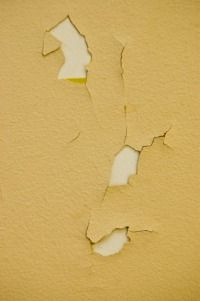

In [7]:
from IPython.core.display import Image, display
display(Image('poor_example.jpg', width=100, unconfined=True))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)